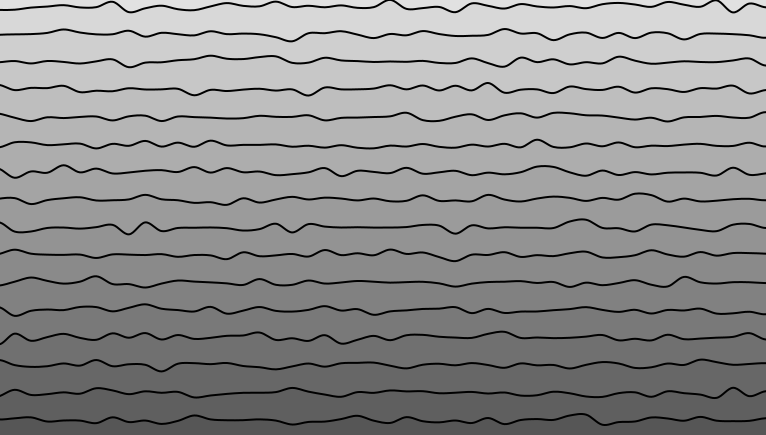

You can use this activity to generate and export wave shapes as svgs


In [1]:
from py5canvas import *

Let's define some paramters for our drawings. These would be globals outside of `draw()` and `setup()` if we move the code of the notebook to an interactive sketch (`.py` file)

In [13]:
wave_amplitude = 80
num_wave_vertices = 150

Then we can draw a "flat" wave function. It will return zero, whatever the input is

In [56]:
def wave(x, y):
    return 0.0

We added two arguments to the function and not one, because later we will use this to vary the wave as we move vertically. It currently returns zero but we will modify it to create more interesting shapes.

Now lets write a second function that we can re-use to draw the wave at a given height:

In [57]:
def draw_wave(y, amp):
    begin_shape()
    # Create a square bottom left corner
    vertex(0, height)
    for j in range(num_wave_vertices):
        xpos = remap(j, 0, num_wave_vertices-1, 0, width)
        ypos = y + wave(xpos, y)*amp
        # Add a curve vertex for each point on the wave
        vertex(xpos, ypos)
    # Create a square bottom on the bottom right
    vertex(width, height)
    end_shape(CLOSE)


We use two arguments:
- The first (`y`) determines the vertical position of the wave.
- The second (`amp`) determines the amplitude by scaling the output of the `wave` function. We pass in the horizontal position `xpos` for each point to the `wave` function to compute the corresponding height.


We can now draw the output:

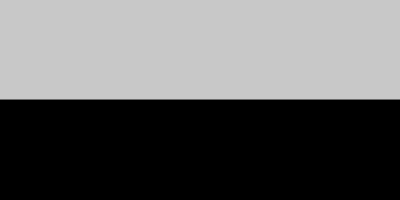

In [58]:
create_canvas(400, 200)
fill(0)
draw_wave(height/2, wave_amplitude)
show()

#### Time to compare number generators

__Random:__

Let's see what happens by using `random`. Again we don't consider the input argument `x` as we did in the flat version



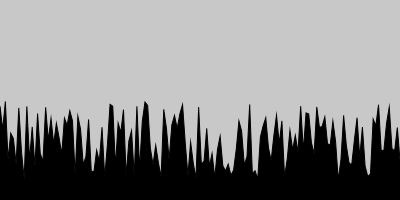

In [60]:
def wave(x, y):
    return random()

create_canvas(400, 200)
fill(0)
draw_wave(height/2, wave_amplitude)
show()

Notice that the output will change every time we execute the code cell. We can keep it fixed by setting the random seed to a number of choice using `random_seed`

__Sine:__

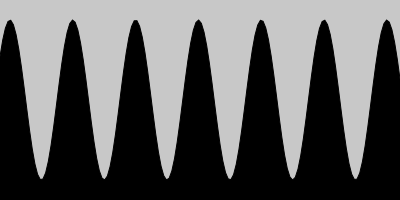

In [72]:
def wave(x, y):
    return sin(x*0.1 + y*0.1)

create_canvas(400, 200)
fill(0)
draw_wave(height/2, wave_amplitude)
show()

__Noise:__

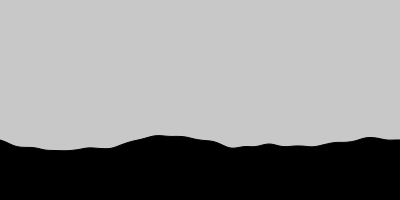

In [73]:
def wave(x, y):
    return noise(x*0.005 + y*0.01)

create_canvas(400, 200)
fill(0)
draw_wave(height/2, wave_amplitude)
show()

## Getting loopy
Let's make things more interesting by creating a loop. We draw multiple waves shifted based on the index `i` of the for loop using the usual `remap` trick:

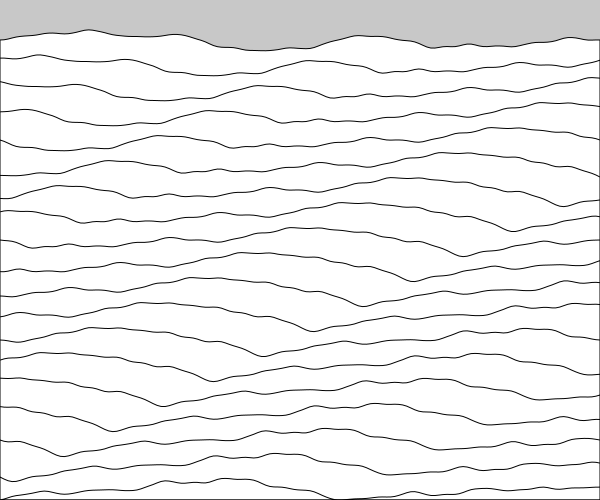

In [74]:
num_waves = 20
create_canvas(600, 500)
for i in range(num_waves):
    y = remap(i, 0, num_waves, 0, height)
    draw_wave(y, wave_amplitude*1)
show()


Notice that this takes a while. The reason is that we are creating a loop and then for each call to `draw_wave` we are computing the wave value for each vertex of the shape. We will see later in the course how we can make this MUCH faster, but for now you will have to bear with the slowness...
 
You can also see that all the waves are all shifted versions of the same wave (if using `sin` or `noise`). The reason is that we used the `y` parameter in the noise function as a phase, meaning that we are shifting the wave horizontally.

If using noise, we can make things more varied by using 2D noise instead of 1D noise. 2D noise gives us one value (between 0 and 1) given two coordinates. 



Imagine an image like this:

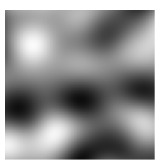

`noise(x,y)` gives us the amount brightness (between zero and 1) of a pixel in this image. So we can write a new wave function, where we simply replace the `+` with a comma:

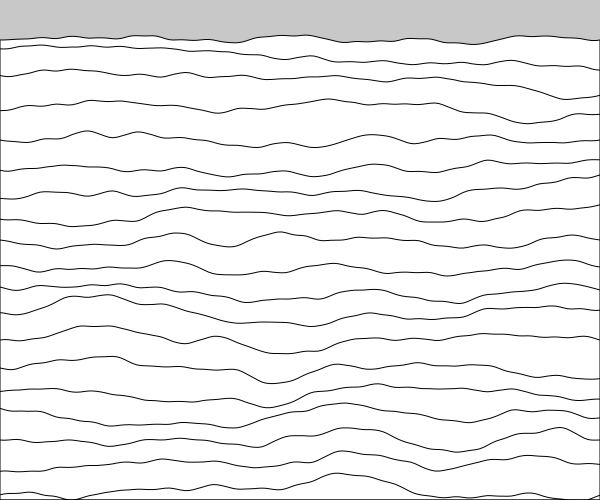

In [75]:
def wave(x, y):
    return noise(x*0.005, y*0.01)

num_waves = 20
create_canvas(600, 500)
for i in range(num_waves):
    y = remap(i, 0, num_waves, 0, height)
    draw_wave(y, wave_amplitude*1)
show()

You can think of it as taking "rows" from a noise image, or "slices" from a terrain such as this one:

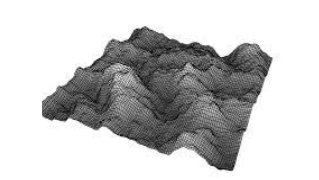

## Making things a bit faster
One way to make things faster is reducing the number of vertices we draw for each wave form (e.g. `num_wave_vertices = 20`), and then using `curve_vertex` instead of `vertex` in the `draw_wave` function. We want to modify only the `vertex` inside the loop, otherwise we will not get corners at the bottom of the shape!

In the short future, to really take advantage of optimizations in Python we will treat all the values we pass to `wave` as a vector and compute everything really fast. 

## Experiment


Experiment with the codes above. For example:
- Change amplitude depending on the height by using `remap` to map `i` to an amplitude.
- Modify the wave form, what if you combine 2d noise and sine waves?
- Can you change colors for each wave forms using `remap` again?
- What if you draw shapes or text for each point instead of creating shapes?

### Saving to SVG/PDF
As usual you can save your notebook output using:

In [76]:
save('waves.pdf')